## Simple Learning Regression Model Building

## Objective
The objective is to use linear regression to understand how years of experience impact Salary.

In [3]:
# Immport some libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Loading the data set
df = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Linear_Regression_Introduction/master/Salary_Data.csv')
df.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
# Shape of data set 
df.shape

(30, 2)

In [7]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [8]:
# Checking for null values
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Our independent variable is `YearsExperieance` and our dependent variable is `Salary`

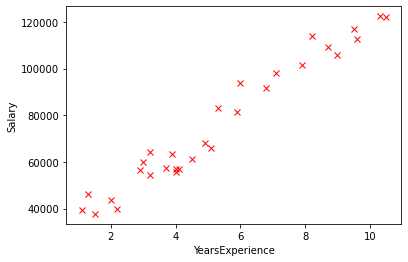

In [9]:
# Visualize the relationship between the independent and dependent variable and the data distribution
plt.plot(df["YearsExperience"], df["Salary"], "rx")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

The input and output variables are linearly distributed

### Splitting the data

In [12]:
# Randomly sampled test data set, 30% of the original data set.
test = df.sample(frac=0.3, random_state=1)
test


,YearsExperience,Salary
17,5.3,83088.0
21,7.1,98273.0
10,3.9,63218.0
19,6.0,93940.0
14,4.5,61111.0
20,6.8,91738.0
26,9.5,116969.0
3,2.0,43525.0
24,8.7,109431.0


In [13]:
# Our train data set
index = list(test.index)
train = df.drop(index, axis=0)
train

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0
11,4.0,55794.0


Text(0, 0.5, 'y_train')

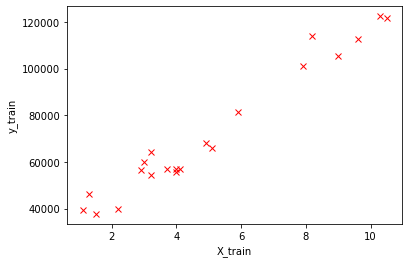

In [14]:
# Visualize the train data set
plt.plot(train["YearsExperience"], train["Salary"], "rx")
plt.xlabel("X_train")
plt.ylabel("y_train")

### Let's find the regression line using Gradient Discent Algorithm

Our regression line is a straight line equation:
$ y = mx + b $
<p>
where
<p>
y : dependent variable in our case, YearsExperience<p>
x : independent variable  in our case, Salary<p>
m : coefficient (slope of the line)<p>
b : intercept
<p>
We are to find the right slope and intercept of the regression line. <p> We will use equation of Mean Square Error (MSE) as our  cost function.<p>
$$
MSE = \frac{1}{n}\sum_{i=1}^n(y_i-y_{predicted})^2 
$$
<p>
where:<p>
$ y_i : actual\, value\, of \,the\, dependent\, variable$
<p>
$y_{predicted} : predicted\,value\, of\, the\, dependent\, variable$<p>
$n : total\, number\, of\, outcomes$<p>

$$
y_{predicted} = mx_i+b
$$

$$
\therefore MSE = \frac{1}{n}\sum_{i=1}^n(y_i-(mx_i+b))^2 
$$
<p>
Partial derivative of MSE w.r.t. m (slope):<p>
$$
\frac{\partial}{\partial m} MSE= \frac{2}{n}\sum_{i=1}^n-x_i(y_i-(mx_i+b))
$$
<p>
Partial derivative of MSE w.r.t. b (intercept):<p>
$$
\frac{\partial}{\partial b} MSE= \frac{2}{n}\sum_{i=1}^n-(y_i-(mx_i+b))
$$
<p>
Gradient descent step towards the global minimum:
<p>
    $$ m \rightarrow m - \alpha \frac{\partial}{\partial m} MSE $$
<p>
     $$ b \rightarrow b - \alpha \frac{\partial}{\partial b} MSE $$
<p>
$ \alpha: {learning}\, {rate} $
<p>
We are to find the value of the slope $m$ and the value of the intercept $b$ at which the cost function $MSE$ is at its global minimum. Meaning we are to reduce the cost function to its best minimum.



### Training our model

In [15]:
# We use numpy array instead of python list because of numpy array convenience in matrix multiplication and it's faster
X_train = np.array(train["YearsExperience"])
y_train = np.array(train["Salary"])
m_curr = b_curr = 0
learning_rate = 0.01
n = len(X_train)
iterations = 10000
y_predicted = m_curr * X_train + b_curr

for i in range(iterations):
    MSE = 1/n*sum([val**2 for val in (y_train-y_predicted)])
    dir_m = -(2/n)*sum(X_train*(y_train-y_predicted)) # derivative of MSE w.r.t. slope m
    dir_b = -(2/n)*sum(y_train-y_predicted) # derivative of MSE w.r.t. intercept b
    m_curr = m_curr - (learning_rate * dir_m)
    b_curr = b_curr - (learning_rate * dir_b)
    y_predicted = m_curr * X_train + b_curr
    print(f"iteration {i}: m = {m_curr}, b = {b_curr}, MSE = {MSE}")


iteration 0: m = 8880.517142857143, b = 1446.4733333333331, MSE = 6000213781.571428
iteration 1: m = 11573.763990312924, b = 1970.8909044897955, MSE = 718621248.5909122
iteration 2: m = 12381.938158280484, b = 2213.9564412790046, MSE = 226987611.65207145
iteration 3: m = 12615.83135547257, b = 2370.8814367254063, MSE = 180017819.69044667
iteration 4: m = 12674.814815650105, b = 2501.144959288133, MSE = 174339373.957649
iteration 5: m = 12680.568511451404, b = 2622.8711605474646, MSE = 172507199.4308313
iteration 6: m = 12670.165543456893, b = 2741.5841803753074, MSE = 171045149.3048914
iteration 7: m = 12654.901022436417, b = 2858.9691811591842, MSE = 169630402.95144567
iteration 8: m = 12638.216032038237, b = 2975.541656612871, MSE = 168232863.3254365
iteration 9: m = 12621.15869529047, b = 3091.4607158775298, MSE = 166849608.1190072
iteration 10: m = 12604.048050372025, b = 3206.776874681242, MSE = 165480238.93317634
iteration 11: m = 12586.980999676693, b = 3321.5075523121072, MSE =

iteration 970: m = 9229.300872986123, b = 25867.825482619675, MSE = 30191710.413446486
iteration 971: m = 9229.164927661357, b = 25868.738332788867, MSE = 30191624.589758866
iteration 972: m = 9229.02966512167, b = 25869.646598170195, MSE = 30191539.626004897
iteration 973: m = 9228.895081937777, b = 25870.550301790747, MSE = 30191455.513568185
iteration 974: m = 9228.761174697613, b = 25871.449466561953, MSE = 30191372.243918724
iteration 975: m = 9228.627940006252, b = 25872.34411528017, MSE = 30191289.808612004
iteration 976: m = 9228.495374485821, b = 25873.234270627272, MSE = 30191208.19928808
iteration 977: m = 9228.36347477541, b = 25874.1199551712, MSE = 30191127.407670796
iteration 978: m = 9228.23223753099, b = 25875.001191366555, MSE = 30191047.425566923
iteration 979: m = 9228.101659425327, b = 25875.878001555153, MSE = 30190968.244865336
iteration 980: m = 9227.971737147898, b = 25876.750407966607, MSE = 30190889.857536156
iteration 981: m = 9227.842467404806, b = 25877.61

iteration 1402: m = 9205.308089395636, b = 26028.933020503915, MSE = 30183255.48980399
iteration 1403: m = 9205.292647770988, b = 26029.036708436524, MSE = 30183254.38250575
iteration 1404: m = 9205.277283701864, b = 26029.13987559673, MSE = 30183253.286302406
iteration 1405: m = 9205.261996798741, b = 26029.242524600115, MSE = 30183252.20108279
iteration 1406: m = 9205.246786674055, b = 26029.344658049115, MSE = 30183251.126736797
iteration 1407: m = 9205.231652942184, b = 26029.446278533105, MSE = 30183250.063155502
iteration 1408: m = 9205.216595219446, b = 26029.54738862845, MSE = 30183249.01023104
iteration 1409: m = 9205.201613124087, b = 26029.64799089857, MSE = 30183247.96785668
iteration 1410: m = 9205.186706276267, b = 26029.748087894026, MSE = 30183246.935926624
iteration 1411: m = 9205.171874298054, b = 26029.84768215255, MSE = 30183245.914336294
iteration 1412: m = 9205.157116813418, b = 26029.946776199144, MSE = 30183244.90298204
iteration 1413: m = 9205.142433448216, b =

iteration 2161: m = 9202.30090185232, b = 26049.12578301655, MSE = 30183145.031420626
iteration 2162: m = 9202.300563820158, b = 26049.128052846117, MSE = 30183145.03088999
iteration 2163: m = 9202.300227485759, b = 26049.130311275472, MSE = 30183145.030364666
iteration 2164: m = 9202.2998928406, b = 26049.13255836187, MSE = 30183145.029844616
iteration 2165: m = 9202.299559876195, b = 26049.134794162284, MSE = 30183145.02932977
iteration 2166: m = 9202.299228584105, b = 26049.137018733396, MSE = 30183145.028820097
iteration 2167: m = 9202.298898955925, b = 26049.1392321316, MSE = 30183145.028315507
iteration 2168: m = 9202.298570983305, b = 26049.14143441302, MSE = 30183145.027815994
iteration 2169: m = 9202.298244657924, b = 26049.143625633485, MSE = 30183145.027321473
iteration 2170: m = 9202.297919971514, b = 26049.14580584855, MSE = 30183145.026831932
iteration 2171: m = 9202.29759691584, b = 26049.147975113494, MSE = 30183145.026347283
iteration 2172: m = 9202.297275482711, b = 2

iteration 2781: m = 9202.236564861838, b = 26049.557795171066, MSE = 30183144.97856486
iteration 2782: m = 9202.23654996206, b = 26049.557895220587, MSE = 30183144.978563834
iteration 2783: m = 9202.236535137115, b = 26049.55799476761, MSE = 30183144.97856282
iteration 2784: m = 9202.23652038663, b = 26049.558093814656, MSE = 30183144.978561804
iteration 2785: m = 9202.236505710229, b = 26049.558192364242, MSE = 30183144.978560816
iteration 2786: m = 9202.23649110754, b = 26049.558290418863, MSE = 30183144.97855982
iteration 2787: m = 9202.236476578193, b = 26049.558387981004, MSE = 30183144.978558812
iteration 2788: m = 9202.23646212182, b = 26049.558485053138, MSE = 30183144.97855785
iteration 2789: m = 9202.236447738054, b = 26049.558581637728, MSE = 30183144.978556883
iteration 2790: m = 9202.23643342653, b = 26049.558677737223, MSE = 30183144.97855594
iteration 2791: m = 9202.236419186886, b = 26049.558773354056, MSE = 30183144.978555
iteration 2792: m = 9202.236405018759, b = 260

iteration 3370: m = 9202.233751106494, b = 26049.576689068635, MSE = 30183144.978462253
iteration 3371: m = 9202.233750338795, b = 26049.5766942236, MSE = 30183144.978462234
iteration 3372: m = 9202.233749574953, b = 26049.576699352674, MSE = 30183144.978462223
iteration 3373: m = 9202.233748814948, b = 26049.576704455987, MSE = 30183144.97846224
iteration 3374: m = 9202.23374805876, b = 26049.57670953367, MSE = 30183144.978462223
iteration 3375: m = 9202.233747306367, b = 26049.576714585848, MSE = 30183144.97846223
iteration 3376: m = 9202.233746557757, b = 26049.576719612654, MSE = 30183144.97846221
iteration 3377: m = 9202.233745812904, b = 26049.576724614213, MSE = 30183144.978462223
iteration 3378: m = 9202.233745071791, b = 26049.57672959065, MSE = 30183144.978462223
iteration 3379: m = 9202.233744334402, b = 26049.576734542094, MSE = 30183144.97846222
iteration 3380: m = 9202.233743600718, b = 26049.576739468666, MSE = 30183144.978462234
iteration 3381: m = 9202.233742870718, b 

iteration 4151: m = 9202.233601249847, b = 26049.577695331016, MSE = 30183144.978461944
iteration 4152: m = 9202.233601234804, b = 26049.57769543203, MSE = 30183144.978461985
iteration 4153: m = 9202.233601219836, b = 26049.57769553254, MSE = 30183144.978461973
iteration 4154: m = 9202.233601204942, b = 26049.57769563254, MSE = 30183144.978461985
iteration 4155: m = 9202.233601190124, b = 26049.577695732038, MSE = 30183144.978461973
iteration 4156: m = 9202.233601175381, b = 26049.577695831038, MSE = 30183144.978461973
iteration 4157: m = 9202.233601160711, b = 26049.57769592954, MSE = 30183144.97846197
iteration 4158: m = 9202.233601146116, b = 26049.577696027547, MSE = 30183144.978461996
iteration 4159: m = 9202.233601131593, b = 26049.577696125063, MSE = 30183144.978461973
iteration 4160: m = 9202.233601117143, b = 26049.577696222088, MSE = 30183144.978461973
iteration 4161: m = 9202.233601102767, b = 26049.577696318625, MSE = 30183144.97846197
iteration 4162: m = 9202.233601088463,

iteration 4829: m = 9202.233598353221, b = 26049.57771478137, MSE = 30183144.978461962
iteration 4830: m = 9202.233598352726, b = 26049.577714784697, MSE = 30183144.978461973
iteration 4831: m = 9202.233598352233, b = 26049.577714788004, MSE = 30183144.97846197
iteration 4832: m = 9202.233598351744, b = 26049.577714791296, MSE = 30183144.97846198
iteration 4833: m = 9202.233598351257, b = 26049.57771479457, MSE = 30183144.978461962
iteration 4834: m = 9202.233598350771, b = 26049.57771479783, MSE = 30183144.978461985
iteration 4835: m = 9202.233598350287, b = 26049.57771480107, MSE = 30183144.978461973
iteration 4836: m = 9202.233598349807, b = 26049.577714804298, MSE = 30183144.97846198
iteration 4837: m = 9202.233598349329, b = 26049.577714807507, MSE = 30183144.978461973
iteration 4838: m = 9202.233598348854, b = 26049.5777148107, MSE = 30183144.978462003
iteration 4839: m = 9202.23359834838, b = 26049.577714813877, MSE = 30183144.97846197
iteration 4840: m = 9202.23359834791, b = 2

iteration 5369: m = 9202.233598261137, b = 26049.577715399704, MSE = 30183144.97846197
iteration 5370: m = 9202.233598261104, b = 26049.577715399922, MSE = 30183144.97846197
iteration 5371: m = 9202.233598261071, b = 26049.57771540014, MSE = 30183144.978461955
iteration 5372: m = 9202.233598261038, b = 26049.57771540036, MSE = 30183144.978461973
iteration 5373: m = 9202.233598261006, b = 26049.577715400574, MSE = 30183144.97846198
iteration 5374: m = 9202.233598260975, b = 26049.57771540079, MSE = 30183144.978461962
iteration 5375: m = 9202.233598260944, b = 26049.577715401003, MSE = 30183144.978461962
iteration 5376: m = 9202.233598260911, b = 26049.577715401214, MSE = 30183144.978461955
iteration 5377: m = 9202.23359826088, b = 26049.577715401425, MSE = 30183144.97846198
iteration 5378: m = 9202.23359826085, b = 26049.577715401636, MSE = 30183144.978461962
iteration 5379: m = 9202.233598260817, b = 26049.577715401847, MSE = 30183144.97846198
iteration 5380: m = 9202.233598260786, b =

iteration 6246: m = 9202.233598254717, b = 26049.577715442807, MSE = 30183144.978461985
iteration 6247: m = 9202.233598254717, b = 26049.57771544281, MSE = 30183144.97846198
iteration 6248: m = 9202.233598254717, b = 26049.577715442814, MSE = 30183144.97846198
iteration 6249: m = 9202.233598254716, b = 26049.577715442818, MSE = 30183144.97846197
iteration 6250: m = 9202.233598254716, b = 26049.57771544282, MSE = 30183144.97846197
iteration 6251: m = 9202.233598254716, b = 26049.577715442825, MSE = 30183144.97846198
iteration 6252: m = 9202.233598254716, b = 26049.57771544283, MSE = 30183144.97846198
iteration 6253: m = 9202.233598254714, b = 26049.577715442832, MSE = 30183144.978461962
iteration 6254: m = 9202.233598254714, b = 26049.577715442836, MSE = 30183144.978461962
iteration 6255: m = 9202.233598254714, b = 26049.57771544284, MSE = 30183144.978461973
iteration 6256: m = 9202.233598254712, b = 26049.577715442843, MSE = 30183144.97846198
iteration 6257: m = 9202.233598254712, b = 

iteration 6868: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 6869: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 6870: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 6871: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 6872: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 6873: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 6874: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 6875: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 6876: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 6877: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 6878: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 6879: m = 9202.2335982

iteration 7605: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 7606: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 7607: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 7608: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 7609: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 7610: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 7611: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 7612: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 7613: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 7614: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 7615: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 7616: m = 9202.2335982

iteration 8367: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 8368: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 8369: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 8370: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 8371: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 8372: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 8373: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 8374: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 8375: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 8376: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 8377: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 8378: m = 9202.2335982

iteration 9017: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 9018: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 9019: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 9020: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 9021: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 9022: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 9023: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 9024: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 9025: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 9026: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 9027: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 9028: m = 9202.2335982

iteration 9717: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 9718: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 9719: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 9720: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 9721: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 9722: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 9723: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 9724: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 9725: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 9726: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 9727: m = 9202.233598254692, b = 26049.577715442985, MSE = 30183144.978461973
iteration 9728: m = 9202.2335982

We had a convergence after 10000 iterations with<p>
m =  9202.233598254692<p>
b = 26049.577715442985<p>
MSE (cost function) = 30183144.978461973p>
The regression equation (our model) becomes $ y_{predicted} = 9202.233598254692x + 26049.577715442985 $
    

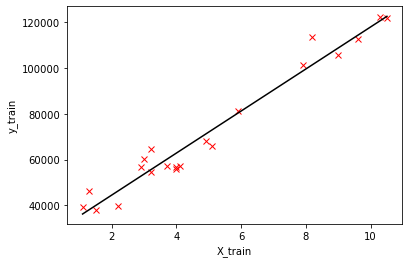

In [16]:
# Fitting the regression line in the train data chart
plt.plot(train["YearsExperience"], train["Salary"], "rx")
plt.plot( X_train, y_predicted, "black")
plt.xlabel("X_train")
plt.ylabel("y_train")
plt.show()

### Make predictions based on  our model
Now that we have trained our algorithm, it’s time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the salaries.

We will do so by passing the dependent variable (X_test) of our test data in this regression equation  $ y_{predicted} = 9225.62353770472x + 25892.518175359033$.

In [17]:
X_test = np.array(test["YearsExperience"])
y_test = np.array(test["Salary"])
y_predicted = m_curr * X_test + b_curr

We have our predictions in y_predicted. Now let's visualize the data set and the regression line with the test data:

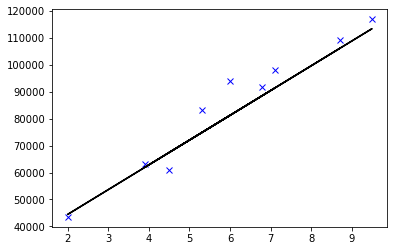

In [18]:
plt.plot(X_test, y_test, "bx")
plt.plot(X_test, y_predicted, "black")
plt.show()



### Evaluation of our model
There are three primary metrics we used to evaluate regression models namely, Mean absolute error (MAE), Mean squared error (MSE), or Root mean squared error (RMSE). 
$$ MAE = \frac{1}{n}\sum_{i=1}^n(\mid y-y_{predicted} \mid )$$
<p>
$$ MSE = \frac{1}{n}\sum_{i=1}^n(y_i-y_{predicted})^2 $$
<p>
$$ RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^n(y_i-y_{predicted})^2} $$


In [22]:
def metric_MAE(y_test, y_pred):
    n = len(y_test)
    metric = (1/n)*sum(abs(y_test - y_pred))
    return metric

def metric_MSE(y_test, y_pred):
    n = len(y_test)
    metric = (1/n)*sum((y_test-y_pred)**2)
    return metric

def metric_RMSE(y_test, y_pred):
    n = len(y_test)
    metric = np.sqrt((1/n)*sum((y_test-y_pred)**2))
    return metric

print(f"MAE: {metric_MAE(y_test, y_predicted)}")
print(f"MSE: {metric_MSE(y_test, y_predicted)}")
print(f"RMSE: {metric_RMSE(y_test, y_predicted)}")

MAE: 5146.886734888185
MSE: 39139215.999588385
RMSE: 6256.1342696259635


**Now that we have grasped what simple linear regression is, let's impliment all that have done with `scikit learn` python library and compare our results.**

In [23]:
# Setting variables
X = df[['YearsExperience']]
y = df['Salary']

In [48]:
# import SK Learn train test split
from sklearn.model_selection import train_test_split

# Assign variables to capture train test split output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

After splitting the data into training and testing sets, finally, the time is to train our algorithm. Firstly, importing of sklearn.linear_model is required for us to access LinearRegression class. It then needs to be instantiated and model fit to our training data. This is seen below.

In [49]:
# For building regression model
from sklearn.linear_model import LinearRegression

In [50]:
# Create object for the class
linear_regressor = LinearRegression() 

# Fit model to our training data i.e learn coefficients
linear_regressor.fit(X_train, y_train)


LinearRegression()

#### Let's interpret the coefficients 
<p>
These coefficients are the slop $m$ and the intercept $b$ of our regression equation

In [51]:
print("Scikit Learn results:")

# prints the coefficient (slope)
m = linear_regressor.coef_
print(f"m = {m}")

# prints y-intercept
b = linear_regressor.intercept_
print(f"b = {b}\n")

print("Our results:")
print("m = 9202.233598254692")
print("b = 26049.577715442985")

Scikit Learn results:
m = [9202.23359825]
b = 26049.577715443353

Our results:
m = 9202.233598254692
b = 26049.577715442985


We can see that the results we got from our own algorithm are equal to what scikit learn evaluated.

**Make Predictions**

Now that we have trained our algorithm, it’s time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the salaries. <p> Making predictions based on your model is as simple as using the code below: passing the predict method your test data. This will return predicted values of y given the new test X data.

In [52]:
# Make predictions
y_pred = linear_regressor.predict(X_test) 

We have our predictions in y_pred. Now lets visualize the data set and the regression line with the test data:

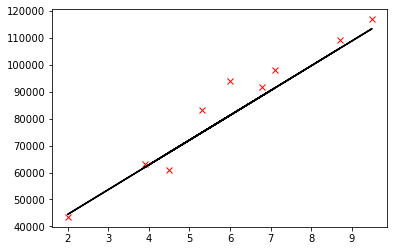

In [53]:
plt.plot(X_test, y_test,'rx')
plt.plot(X_test, y_pred, color='black')
plt.show()

**Evaluation of model**

In [54]:
# import metrics library
from sklearn import metrics

In [56]:
print("Scikit Learn Evaluation:")

metric_MAE = metrics.mean_absolute_error(y_test, y_pred)
# print result of MAE
print(f"MAE = {metric_MAE}")
      
metric_MSE = metrics.mean_squared_error(y_test, y_pred)
#print result of MSE
print(f"MSE = {metric_MSE}")

metric_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
#print result of RMSE
print(f"RMSE = {metric_RMSE}\n")

print("Our Evaluation:")
print("MAE = 5146.886734888185 \nMSE = 39139215.999588385 \nRMSE = 6256.1342696259635")




Scikit Learn Evaluation:
MAE = 5146.886734888234
MSE = 39139215.99958858
RMSE = 6256.134269625979

Our Evaluation:
MAE = 5146.886734888185 
MSE = 39139215.999588385 
RMSE = 6256.1342696259635


Scikit learn results are same with our algorithm results

_**Note:Sometimes, adjusting the hyperparamters of our algorithm help to get a better evaluation of our model.**_